In [1]:
# Import sys, then tell python where to find the nEXO-specific classes
# I'll assume you're in the sensitivity/work directory, as shown here by !pwd

import sys
!pwd
sys.path.append('../../../modules')

/g/g20/lenardo1/nEXO/sensitivity/work/SensitivityPaper2020_scripts/PaperPlots


In [2]:
# Import useful libraries for analysis

import pandas as pd
import histlite as hl
import numpy as np
from matplotlib import pyplot as plt
import os
from cycler import cycler
plt.rcParams["font.family"] = "serif"
plt.rcParams["mathtext.fontset"] = "dejavuserif"

import matplotlib
from matplotlib.backends.backend_pdf import PdfPages

plt.rcParams.update({'font.size': 18})
plt.rcParams['figure.figsize'] = (10,8)

In [3]:
# Import the nEXO sensitivity classes

plt.rcParams.update({'font.size': 18})
plt.rcParams['figure.figsize'] = (10,8)

import nEXOFitWorkspace
import nEXOFitModel
import nEXOFitLikelihood
import nEXOMaterialsDBInterface

import importlib
importlib.reload( nEXOMaterialsDBInterface )
importlib.reload( nEXOFitWorkspace )
importlib.reload( nEXOFitModel )

<module 'nEXOFitModel' from '../../../modules/nEXOFitModel.py'>

In [4]:
optimized_binning_yaml = '../../config/Sensitivity2020_Optimized_DNN_Standoff_Binning_version1.yaml'
workspace2020_d024 = nEXOFitWorkspace.nEXOFitWorkspace(config=optimized_binning_yaml)
workspace2020_d024_ind = nEXOFitWorkspace.nEXOFitWorkspace(config=optimized_binning_yaml)

optimized_binning_components_table = '/p/vast1/nexo/sensitivity2020/pdfs/component_tables/ComponentsTable_D-024_merged-v10b_Optimized_DNN_Standoff_Binning_version1.h5'
workspace2020_d024.LoadComponentsTableFromFile(optimized_binning_components_table)
workspace2020_d024_ind.LoadComponentsTableFromFile(optimized_binning_components_table)




Loading input data froma previously-generated components table....

Loaded dataframe with 138 components.
Contains the following quantities of interest:
	PDFName
	Component
	Isotope
	Material
	Radioassay ID
	MC ID
	Total Mass or Area
	Activity ID
	SpecActiv
	SpecActivErr
	SpecActivErrorType
	RawActiv
	RawActivErr
	TotalHitEff_N
	Histogram
	HistogramAxisNames
	TotalHitEff_K
	Group
	Expected Counts

Fit variables:
	['DNN', 'Energy (keV)', 'Standoff (mm)']

Loading input data froma previously-generated components table....

Loaded dataframe with 138 components.
Contains the following quantities of interest:
	PDFName
	Component
	Isotope
	Material
	Radioassay ID
	MC ID
	Total Mass or Area
	Activity ID
	SpecActiv
	SpecActivErr
	SpecActivErrorType
	RawActiv
	RawActivErr
	TotalHitEff_N
	Histogram
	HistogramAxisNames
	TotalHitEff_K
	Group
	Expected Counts

Fit variables:
	['DNN', 'Energy (keV)', 'Standoff (mm)']


In [5]:
#Create the PDFs for the standard model
workspace2020_d024.CreateGroupedPDFs()
model2020_d024 = nEXOFitModel.nEXOFitModel()
model2020_d024.AddPDFsFromDataframe(workspace2020_d024.df_group_pdfs,\
                               workspace2020_d024.histogram_axis_names)
model2020_d024.GenerateModelDistribution()


Creating grouped PDFs....
no sigma for Rn222_HFE (R-053.9.1.1)
no sigma for Rn222_FieldRingsRadon (R-088.4.1.1)
no sigma for Rn222_CathodeRadon (R-088.1.1.1)
no sigma for Rn222_ActiveLXe (R-088.2.1.1)
no sigma for Ar42_ActiveLXe (R-088.2.1.1)
no sigma for Rn222_InactiveLXe (R-088.3.1.1)
no sigma for Ar42_InactiveLXe (R-088.3.1.1)

ERROR: No histogram available for K40_OuterCryostatWTSupport

ERROR: No histogram available for Co60_OuterCryostatWTSupport
	Group:                              	Expected Counts:
	Far                                 	      5035.5790
	Vessel_U238                         	      1923.6764
	Vessel_Th232                        	       608.1521
	Internals_U238                      	      5235.7511
	Internals_Th232                     	      2763.1621
	Rn222                               	     21223.2388
	FullTPC_K40                         	  41173540.8786
	B8nu                                	        12.9712
	FullLXeBb2n                         	  14756881.4535
	

Hist(14 bins in [0.0,1.0], 250 bins in [1000.0,3500.0], 22 bins in [0.0,650.0], with sum 55967246.981412604, 8309 empty bins, and 0 non-finite values)

In [6]:
roi_cut_dict_2020_d024 = {'DNN': (0.86,1.),
                    'Energy (keV)': (2434., 2480.),
                    'Standoff (mm)': (104.5, 650.)
                    }

workspace2020_d024.DefineROI( roi_cut_dict_2020_d024 )

DNN:
	Input ROI boundaries:      0.86,      1.0
	Actual ROI boundaries:     0.86,      1.0
Energy (keV):
	Input ROI boundaries:    2434.0,   2480.0
	Actual ROI boundaries:   2430.0,   2480.0
Standoff (mm):
	Input ROI boundaries:     104.5,    650.0
	Actual ROI boundaries:    100.0,    650.0


In [7]:
likelihood2020 = nEXOFitLikelihood.nEXOFitLikelihood()
likelihood2020.AddPDFDataframeToModel(workspace2020_d024.df_group_pdfs,\
                                      axis_names=workspace2020_d024.histogram_axis_names)

sig_idx = likelihood2020.model.GetVariableIndexByName('Bb0n')
likelihood2020.model.variable_list[sig_idx]['Value'] = 8.43


likelihood2020.AddDataset( likelihood2020.model.GenerateDataset() )

likelihood2020.PrintVariableList()


Variable name:          Value:       IsFixed:  FitError   InputError:   IsConstrained: Limits:      
Num_Far                 5.036e+03    False     None       70.96         False          (None,None)
Num_Vessel_U238         1.924e+03    False     None       43.86         False          (None,None)
Num_Vessel_Th232        608.2        False     None       24.66         False          (None,None)
Num_Internals_U238      5.236e+03    False     None       72.36         False          (None,None)
Num_Internals_Th232     2.763e+03    False     None       52.57         False          (None,None)
Num_Rn222               2.122e+04    False     None       145.7         False          (None,None)
Num_FullTPC_K40         4.117e+07    False     None       6.417e+03     False          (None,None)
Num_B8nu                12.97        False     None       3.602         False          (None,None)
Num_FullLXeBb2n         1.476e+07    False     None       3.841e+03     False          (None,None)
Num_Full

In [8]:
# Set up the plotting parameters
initial_cycler = plt.rcParams['axes.prop_cycle']
plt.rcParams.update({'font.size': 14})
custom_cycler = cycler( color = [ (1.,0.5,0.),\
                                 (0.,0.,1.,0.5),\
                                 (0.,0.8,0.),\
                                 (1.,0.,0.),\
                                 (0.5,1.,0.5),\
                                 (0.,0.8,0.8),\
                                 (0.1,0.6,0.5),\
                                 (1.,0.,1.),\
                                 (0.5,0.,0.5) ] ) 
plt.rc('axes', prop_cycle=custom_cycler)



Plotting Far
Plotting VesselU238
Plotting VesselTh232
Plotting InternalsU238
Plotting InternalsTh232
Plotting Rn222
Plotting FullTPCK40
Plotting B8nu
Plotting FullLXeBb2n
Plotting FullLXeBb0n
Plotting Xe137andAr42
Plotting data...
DNN:
	Input cut boundaries:       0.0,      1.0
	Actual ROI boundaries:      0.0,      1.0
Energy (keV):
	Input cut boundaries:    1000.0,   3500.0
	Actual ROI boundaries:   1000.0,   3500.0
Standoff (mm):
	Input cut boundaries:       0.0,    650.0
	Actual ROI boundaries:      0.0,    650.0
Plotting Far
Plotting VesselU238
Plotting VesselTh232
Plotting InternalsU238
Plotting InternalsTh232
Plotting Rn222
Plotting FullTPCK40
Plotting B8nu
Plotting FullLXeBb2n
Plotting FullLXeBb0n
Plotting Xe137andAr42
Plotting data...
DNN:
	Input cut boundaries:       0.0,      1.0
	Actual ROI boundaries:      0.0,      1.0
Energy (keV):
	Input cut boundaries:    1000.0,   3500.0
	Actual ROI boundaries:   1000.0,   3500.0
Standoff (mm):
	Input cut boundaries:       0.0,    650

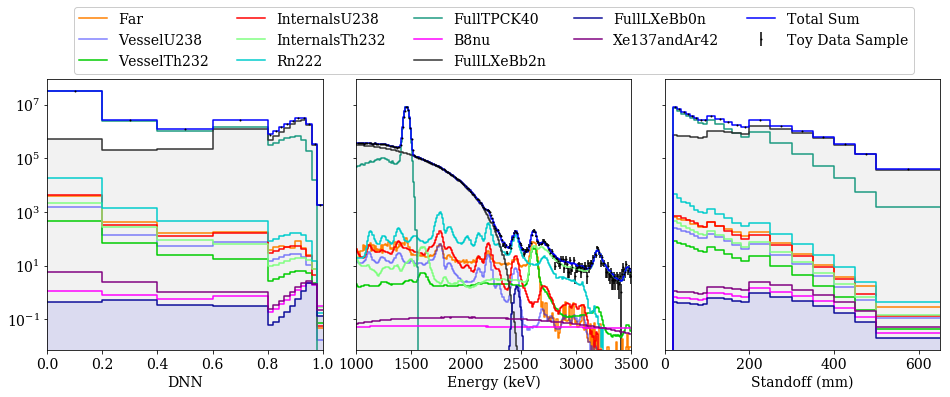

In [9]:
cut_dict = {'DNN': (0.,1.),
                    'Energy (keV)': (1000.,3500.),
                    'Standoff (mm)': (0., 650.)
                    }


plot_data=True
show_legend=True

plt.rcParams.update({'font.size': 14})

fig, ax = plt.subplots (1, 3, figsize=(16, 5), gridspec_kw={'wspace':0.12}, sharey=True)


# Loop over pdfs and each to plot
for j in range(3):
    for i in range(len(likelihood2020.model.variable_list)):
        var = likelihood2020.model.variable_list[i]
        if 'Num' in var['Name']:

            weight = var['Value']
            cut_pdf = likelihood2020.model.GetSlicedDistribution( cut_dict, var_name=var['Name'], verbose=False )
            component_name = ''.join( var['Name'].split('_')[1:] )
            print('Plotting {}'.format(component_name))


            if i == 0:
             # Initialize the summed histograms      
             cut_sum = hl.hist( [np.array([0.]),np.array([0.]),np.array([0.])] , \
                               bins=cut_pdf.bins)
            #else:
            cut_sum += ( weight * cut_pdf )

            #print('Component name: {}'.format(component_name))
            if 'Bb2n' in component_name:
                hl.fill_between( ax[j], 0, (weight * cut_pdf).project([j]), color=(0.5,0.5,0.5), alpha=0.1 )
                hl.plot1d( ax[j], (weight * cut_pdf).project([j]), label=component_name, color=(0.2,0.2,0.2) )
            elif 'Bb0n' in component_name:
                hl.fill_between( ax[j], 0, (weight * cut_pdf).project([j]), color=(0.1,0.1,0.9), alpha=0.1 )
                hl.plot1d( ax[j], (weight * cut_pdf).project([j]), label=component_name, color=(0.05,0.05,0.6) )
            else:
                hl.plot1d( ax[j], (weight * cut_pdf).project([j]), label=component_name )
                
    hl.plot1d(ax[j],cut_sum.project([j]),color='b',label='Total Sum')
                
    if plot_data:
        print('Plotting data...')
        cut_data = likelihood2020.GetSlicedDataset( cut_dict, verbose=True )

        cut_data_1d = cut_data.project([j])
        bin_centers = (cut_data_1d.bins[0][:-1]+cut_data_1d.bins[0][1:])/2.
        ax[j].errorbar(bin_centers,cut_data_1d.values,yerr=np.sqrt(cut_data_1d.values),\
                                                  fmt='ok',markersize=1,label='Toy Data Sample')
                
    ax[j].set_yscale('log')
    ax[j].set_xlim((cut_pdf.project([j])).bins[0][0],(cut_pdf.project([j])).bins[0][-1])
    ax[j].set_xlabel('{}'.format(likelihood2020.model.axis_names[j]))
    
ax[1].set_zorder(100)
if show_legend:
    ax[1].legend(ncol=5,facecolor=(1.,1.,1.),framealpha=1.,\
                 loc='upper center',fontsize=14,bbox_to_anchor=(0.5,1.29))
            
plt.savefig('all_three_event_distributions_projected.png',dpi=300,bbox_inches='tight')
            
            


Plotting Far
Plotting VesselU238
Plotting VesselTh232
Plotting InternalsU238
Plotting InternalsTh232
Plotting Rn222
Plotting FullTPCK40
Plotting B8nu
Plotting FullLXeBb2n
Plotting FullLXeBb0n
Plotting Xe137andAr42
Plotting data...
DNN:
	Input cut boundaries:      0.85,      1.0
	Actual ROI boundaries:     0.84,      1.0
Energy (keV):
	Input cut boundaries:    2434.0,   2480.0
	Actual ROI boundaries:   2430.0,   2480.0
Standoff (mm):
	Input cut boundaries:       0.0,    650.0
	Actual ROI boundaries:      0.0,    650.0


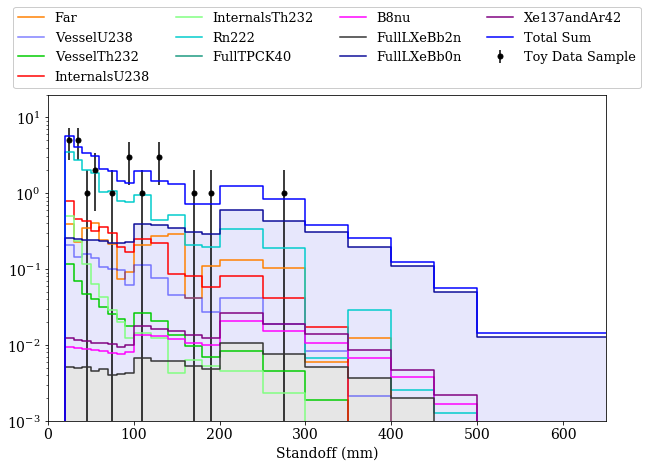

In [10]:
cut_dict = {'DNN': (0.85,1.),
                    'Energy (keV)': (2434.,2480.),
                    'Standoff (mm)': (0., 650.)
                    }

plot_data=True
show_legend=True

plt.rcParams.update({'font.size': 14})

fig, ax = plt.subplots (1, 1, figsize=(10, 6))

for i in range(len(likelihood2020.model.variable_list)):
    var = likelihood2020.model.variable_list[i]
    if 'Num' in var['Name']:

        weight = var['Value']
#         if 'Xe137' in var['Name']:
#             weight *= 1/0.3
        cut_pdf = likelihood2020.model.GetSlicedDistribution( cut_dict, var_name=var['Name'], verbose=False )
        component_name = ''.join( var['Name'].split('_')[1:] )
        print('Plotting {}'.format(component_name))


        if i == 0:
         # Initialize the summed histograms      
         cut_sum = hl.hist( [np.array([0.]),np.array([0.]),np.array([0.])] , \
                           bins=cut_pdf.bins)
        #else:
        cut_sum += ( weight * cut_pdf )

        #print('Component name: {}'.format(component_name))
        if 'Bb2n' in component_name:
            hl.fill_between( ax, 0, (weight * cut_pdf).project([2]), color='0.9', alpha=1., zorder=-1 )
            hl.plot1d( ax, (weight * cut_pdf).project([2]), label=component_name, color=(0.2,0.2,0.2), zorder=51 )
        elif 'Bb0n' in component_name:
            hl.fill_between( ax, 0, (weight * cut_pdf).project([2]), color=(0.1,0.1,0.9), alpha=0.1, zorder=-2 )
            hl.plot1d( ax, (weight * cut_pdf).project([2]), label=component_name, color=(0.05,0.05,0.6),zorder=49 )
        else:
            hl.plot1d( ax, (weight * cut_pdf).project([2]), label=component_name )

hl.plot1d(ax,cut_sum.project([2]),color='b',label='Total Sum')

if plot_data:
    print('Plotting data...')
    cut_data = likelihood2020.GetSlicedDataset( cut_dict, verbose=True )

    cut_data_1d = cut_data.project([2])
    bin_centers = (cut_data_1d.bins[0][:-1]+cut_data_1d.bins[0][1:])/2.
    ax.errorbar(bin_centers,cut_data_1d.values,yerr=np.sqrt(cut_data_1d.values),\
                                              fmt='ok',markersize=5,label='Toy Data Sample')

ax.set_yscale('log')
ax.set_xlim((cut_pdf.project([2])).bins[0][0],(cut_pdf.project([2])).bins[0][-1])
ax.set_xlabel('{}'.format(likelihood2020.model.axis_names[2]))
ax.set_ylim([1.e-3,2.e1])
    
if show_legend:
    ax.legend(ncol=4,facecolor=(1.,1.,1.),framealpha=1.,\
                 loc='upper center',fontsize=13,bbox_to_anchor=(0.5,1.29))
            
plt.savefig('standoff_event_distributions_in_ROI.png',dpi=300,bbox_inches='tight')
            
            
